# <b> Data Science and Business Analytics - TSF </b>
# <b> Task 1 : Prediction using Supervised ML </b>

### **AIM**: Predict the percentage of a student based on the number of study hours
### **LANGUAGE USED** : Python 3
### **IDE** : Jupyter Notebook
### **FORM** : Linear Regression
### **AUTHOR** : Gurman Singh

## **1.** Importing Dataset

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
url = "http://bit.ly/w-data"
data_set = pd.read_csv(url)

data_set.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **2.** Exploring Data

In [63]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [64]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [65]:
#data cleaning is not required here since there is no duplication or missing values
data_set.isnull().sum()

Hours     0
Scores    0
dtype: int64

## **3.** Ploting Graph

No handles with labels found to put in legend.


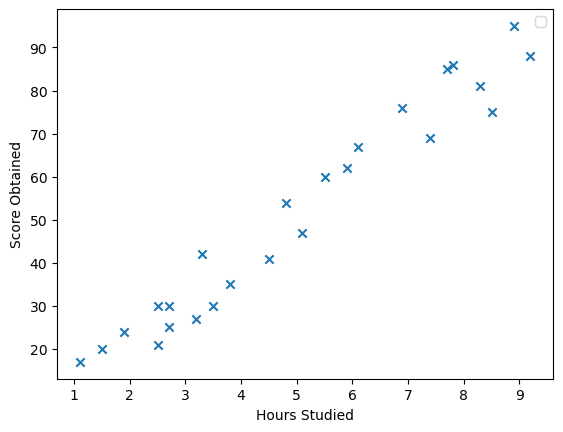

In [66]:
# Graph between the hours studied and score to get better view at Dependent and Independent variables

plt.scatter(data_set['Hours'], data_set['Scores'], marker = "x")
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.legend()
plt.show()

### We can see the graph shows a linear relation between Hours Studied and Score obtained by student

## **4.** Preparing Dataset

In [67]:
# Splitting independent and dependent variable
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

In [68]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [69]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [92]:
# splitting Training and Test data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
print(X_train)

[[8.5]
 [7.4]
 [5.5]
 [7.7]
 [3.2]
 [1.9]
 [4.8]
 [7.8]
 [6.1]
 [1.5]
 [9.2]
 [3.5]
 [5.1]
 [3.3]
 [5.9]
 [2.5]
 [2.5]]


In [93]:
print(X_test)

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]
 [4.5]
 [8.3]
 [2.7]]


In [96]:
print(y_train)

[75 69 60 85 27 24 54 86 67 20 88 30 47 42 62 21 30]


In [97]:
print(y_test)

[95 30 76 35 17 41 81 25]


## **5.** Training Model

In [89]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)
print("Training is completed")

LinearRegression()

## **6.** Visualizing Model

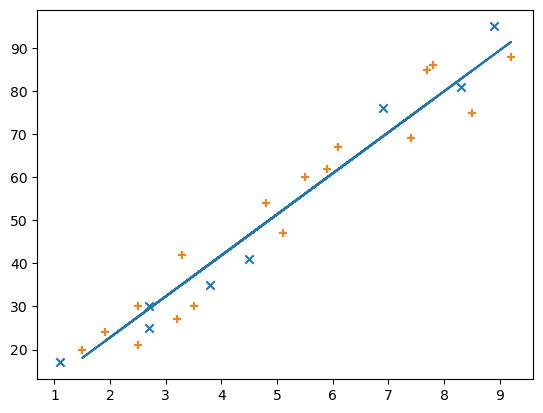

In [91]:
plt.plot(X_train, regressor.predict(X_train))
plt.scatter(X_test,y_test,marker = 'x')
plt.scatter(X_train,y_train, marker='+')
plt.show()

## **7.** Making Predictions

In [98]:
# predicting values on test data set

y_pred = regressor.predict(X_test)

df = pd.DataFrame(data = {"Actual":y_test, 
                          "Predicted Value":y_pred})

print(df)

   Actual  Predicted Value
0      95        88.526602
1      30        29.492644
2      76        69.483390
3      35        39.966411
4      17        14.258075
5      41        46.631535
6      81        82.813638
7      25        29.492644


In [102]:
# Testing with 8.7 hours

hours = 8.7

print(f"No of Hours student studied = {hours}\nPredicted Score = {regressor.predict([[hours]])[0]}")

No of Hours student studied = 8.7
Predicted Score = 86.62228080525034


## **8.** Model Evaluation

In [90]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, regressor.predict(X_test)))

4.142939772140698
